In [1]:
import sys
import os
import numpy as np
import time
from imp import reload

# Set the working directory to the AutomatedCE folder so we have access to L1-L4 modules
resp = os.getcwd()
if 'testing' in resp[-7:]:
    os.chdir(os.path.abspath(os.path.join(os.getcwd(), '..')))
    print(f"new directory is: {os.getcwd()}")

new directory is: C:\Users\Luke\Desktop\Barracuda\AutomatedCE


In [2]:
from L3 import SystemsBuilder

system = SystemsBuilder.CESystem()
system.load_config(config_file=r'C:\Users\Luke\Desktop\Barracuda\AutomatedCE\var\Chip.cfg')


 Change System Config setting if thorlabs is needed. 


C:\Users\Luke\Desktop\Barracuda\AutomatedCE\L1\MicroControlServer.py
['0', '2', '4', '6'] ['ai1', 'ai2', 'ai3', 'ai4'] ['ai9', 'ai10', 'ai11', 'ai12']
['0', '2', '4', '6'] ['ai1', 'ai2', 'ai3', 'ai4'] ['ai9', 'ai10', 'ai11', 'ai12']
{'xy_stage': <L2.XYControl.PycromanagerXY object at 0x000002BB8F3D6F98>, 'objective': <L2.ZControl.PycromanagerZ object at 0x000002BB8F3009B0>, 'filter_wheel': None, 'excitation_shutter': None, 'camera': <L2.CameraControl.PycromanagerControl object at 0x000002BB8F3D6FD0>, 'high_voltage': <L2.HighVoltageControl.PMOD_DAC object at 0x000002BB8F3C7EB8>}


In [3]:
system.open_controllers()
#system.startup_utilities()

OPENING:  mmc1 <L1.Controllers.PycromanagerController object at 0x000002BB8F300978> using port: pycromanager
OPENING:  daq1 <L1.DAQControllers.NiDaq object at 0x000002BB8F300BA8>
OPENING:  ard1 <L1.Controllers.ArduinoController object at 0x000002BB8F34B160> using port: COM3


In [5]:
system.high_voltage.startup()

In [6]:
hv=system.high_voltage

hv.voltages

{'0': [0, 0], '2': [0, 0], '4': [0, 0], '6': [0, 0]}

In [58]:
import time
hv.set_voltage(500,'0')
hv.set_voltage(200,'4')
hv.set_voltage(1,'2')
hv.load_changes()

ERROR:root:ERROR: Voltage set beyond DAC capability
ERROR:root:ERROR: Voltage set beyond DAC capability


In [49]:
hv._power_down()

In [52]:
hv._power_on()

In [32]:
hv.load_changes()

In [60]:
hv.start()

In [28]:
hv.stop()

In [9]:
hv.get_data()

{'voltage': {'0': [0.02275663359737933,
   0.022958958246440245,
   0.023008305714592975,
   0.022661228482088274,
   0.023116870164132046,
   0.022894806521176977,
   0.023215565109705884,
   0.02295731332404023],
  '2': [0.2683656108170415,
   0.26889527377009154,
   0.2694035528168263,
   0.269247285798203,
   0.2691946484835575,
   0.2691387213396816,
   0.26900219331310327,
   0.2687702601557469],
  '4': [0.11670764847688797,
   0.11707446472565182,
   0.11717809442906989,
   0.11678660444256884,
   0.11706624014548503,
   0.11716000035563123,
   0.11693958162572332,
   0.1167619307059839],
  '6': [0.018341679528780918,
   0.018759488146339594,
   0.018687111854145594,
   0.01900622552022368,
   0.01868546693501443,
   0.01869862626651619,
   0.018583482159079814,
   0.018502881283504448]},
 'current': {'0': [-0.010299594391911365,
   -0.010240377419652122,
   -0.010138392640479261,
   -0.010113718908213973,
   -0.010080820588609542,
   -0.009970611228526318,
   -0.010309463881203

66
66
66
66


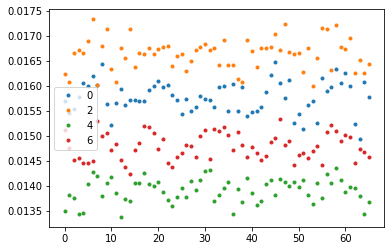

In [64]:
import matplotlib.pyplot as plt


data = hv.get_data()

voltage = data['voltage']

for key,data in voltage.items():
    plt.plot(data,marker='.', linestyle='None', label=key)
    print(len(data))
plt.legend()

In [14]:
plt.show()

In [16]:
hv.controller.send_command('E\n')

[]

In [32]:
hv.controller.send_command('S111\n')

[]

In [53]:
ctl = hv.controller
ctl.send_command('E0000\n')

[]

In [54]:
ctl.send_command('S111\n')

[]

In [55]:
ctl.read_buffer()

[]

In [57]:
hv.startup()